## This notebook is my work for how I decontaminate the images from the MWA (Murchison Widefield Array)

In [1]:
import numpy as np
import scipy as sc
import os
import matplotlib.pyplot as plt

# Loading the Data

### The next four cells are how I easily load in data from my directory. This code is inspired by the pyuv data tutorial. 
Each observation has a set of files so I give the "prefix" or the constant part of the path and then use a for loop that attaches the not constant part of the file to the path. This just cleans it up a bit and saves me from copying and pasting meticulusly. Each observation night was chosen because when looking at the images from those nights there appeared to be some RFI that was not flagged by SSINS

In [2]:
#Observation 1321444384
data_prefix1 = '/Volumes/data1/CatZamora/data/with_ssins/uvf_cubes/1321444384_cubeXX__even_odd_joint_noimgclip_'
files_384 = [data_prefix1 + f for f in ['dirty_xx_sum_uvf.idlsave', 'dirty_yy_sum_uvf.idlsave', 'model_xx_sum_uvf.idlsave',
                                      'model_yy_sum_uvf.idlsave', 'res_xx_sum_uvf.idlsave',
                                      'res_yy_sum_uvf.idlsave']]

In [3]:
#Observation 1321445584
data_prefix2 = '/Volumes/data1/CatZamora/data/with_ssins/uvf_cubes/1321445584_cubeXX__even_odd_joint_noimgclip_'
files_584 = [data_prefix2 + f for f in ['dirty_xx_sum_uvf.idlsave', 'dirty_yy_sum_uvf.idlsave', 'model_xx_sum_uvf.idlsave',
                                      'model_yy_sum_uvf.idlsave', 'res_xx_sum_uvf.idlsave',
                                      'res_yy_sum_uvf.idlsave']]

In [4]:
#Observation 1321445704
data_prefix3 = '/Volumes/data1/CatZamora/data/with_ssins/uvf_cubes/1321445704_cubeXX__even_odd_joint_noimgclip_'
files_704 = [data_prefix3 + f for f in ['dirty_xx_sum_uvf.idlsave', 'dirty_yy_sum_uvf.idlsave', 'model_xx_sum_uvf.idlsave',
                                      'model_yy_sum_uvf.idlsave', 'res_xx_sum_uvf.idlsave',
                                      'res_yy_sum_uvf.idlsave']]

In [5]:
#Observation 1321446904
data_prefix4 = '/Volumes/data1/CatZamora/data/with_ssins/uvf_cubes/1321446904_cubeXX__even_odd_joint_noimgclip_'
files_904 = [data_prefix4 + f for f in ['dirty_xx_sum_uvf.idlsave', 'dirty_yy_sum_uvf.idlsave', 'model_xx_sum_uvf.idlsave',
                                      'model_yy_sum_uvf.idlsave', 'res_xx_sum_uvf.idlsave',
                                      'res_yy_sum_uvf.idlsave']]

# Reading the data

### The next few cells are how I read the data. I use the scipy function io.readsav which allows me to read in .idlsave files

In [6]:
data_384 = []
for i, x in enumerate(files_384):
    data_384.append(sc.io.readsav(x))

In [7]:
data_584 = []
for i, x in enumerate(files_584):
    data_584.append(sc.io.readsav(x))

In [8]:
data_704 = []
for i, x in enumerate(files_704):
    data_704.append(sc.io.readsav(x))

In [9]:
data_904 = []
for i, x in enumerate(files_904):
    data_904.append(sc.io.readsav(x))

In [10]:
print(data_384[5]['kx_mpc'][0:10])

[-0.07202618 -0.06984357 -0.06766096 -0.06547834 -0.06329573 -0.06111312
 -0.05893051 -0.0567479  -0.05456529 -0.05238268]


In [53]:
data_384[5].keys()

dict_keys(['data_sum', 'kx_mpc', 'ky_mpc', 'frequencies', 'kperp_lambda_conv', 'delay_params', 'hubble_param'])

In [52]:
data_384[5]["data_sum"].shape

(768, 34, 67)

In [55]:
data_384[5]['kx_mpc']

array([-0.07202618, -0.06984357, -0.06766096, -0.06547834, -0.06329573,
       -0.06111312, -0.05893051, -0.0567479 , -0.05456529, -0.05238268,
       -0.05020006, -0.04801745, -0.04583484, -0.04365223, -0.04146962,
       -0.03928701, -0.0371044 , -0.03492178, -0.03273917, -0.03055656,
       -0.02837395, -0.02619134, -0.02400873, -0.02182611, -0.0196435 ,
       -0.01746089, -0.01527828, -0.01309567, -0.01091306, -0.00873045,
       -0.00654783, -0.00436522, -0.00218261,  0.        ,  0.00218261,
        0.00436522,  0.00654783,  0.00873045,  0.01091306,  0.01309567,
        0.01527828,  0.01746089,  0.0196435 ,  0.02182611,  0.02400873,
        0.02619134,  0.02837395,  0.03055656,  0.03273917,  0.03492178,
        0.0371044 ,  0.03928701,  0.04146962,  0.04365223,  0.04583484,
        0.04801745,  0.05020006,  0.05238268,  0.05456529,  0.0567479 ,
        0.05893051,  0.06111312,  0.06329573,  0.06547834,  0.06766096,
        0.06984357,  0.07202618])

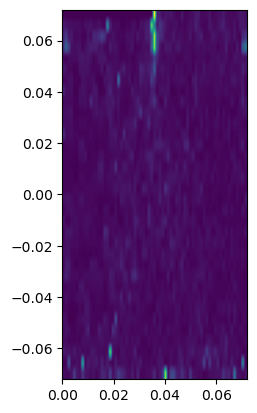

In [58]:
plt.imshow(np.abs(data_384[5]['data_sum'][56,:,:]), extent = [data_384[5]['ky_mpc'][0], data_384[5]['ky_mpc'][-1],
                                                                 data_384[5]['kx_mpc'][0], data_384[5]['kx_mpc'][-1]])

## Plotting the data sum from obs 384

In [79]:
def plot_data_sum(s, freq):
    fig,ax = plt.subplots(1,1) 
    fig.set_size_inches(8, 5)

    plt.imshow(np.abs(data_384[s]['data_sum'][freq,:,:]), extent = [data_384[0]['kx_mpc'][0], data_384[0]['kx_mpc'][-1],data_384[0]['ky_mpc'][0], data_384[0]['ky_mpc'][-1]],
                                                                aspect = 'equal', norm = 'log',vmin = 10e3, vmax = 1e6)
    plt.colorbar()
    plt.title(f'Frequency {freq}')
    

Plotting data sum from the Obs 384 XX Dirty Data Sum


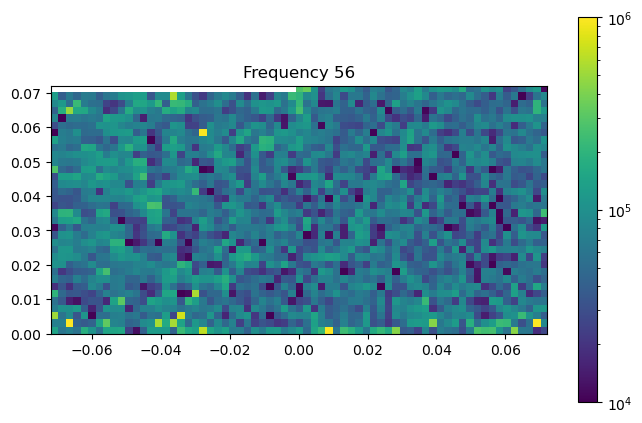

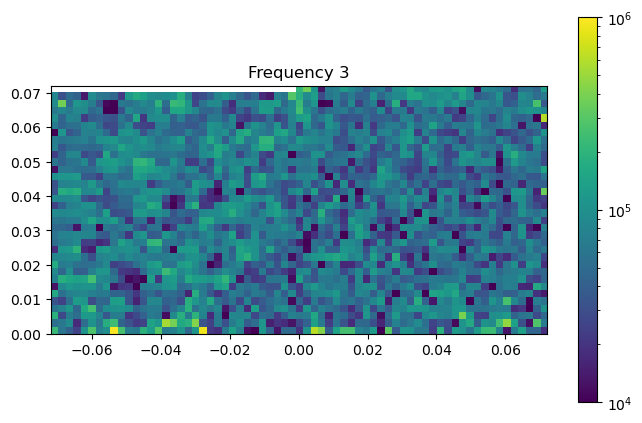

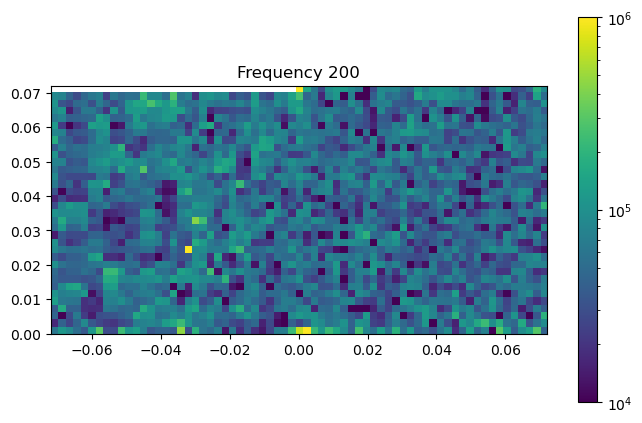

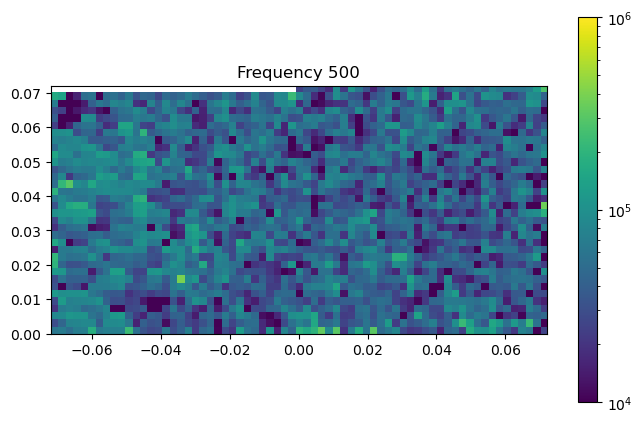

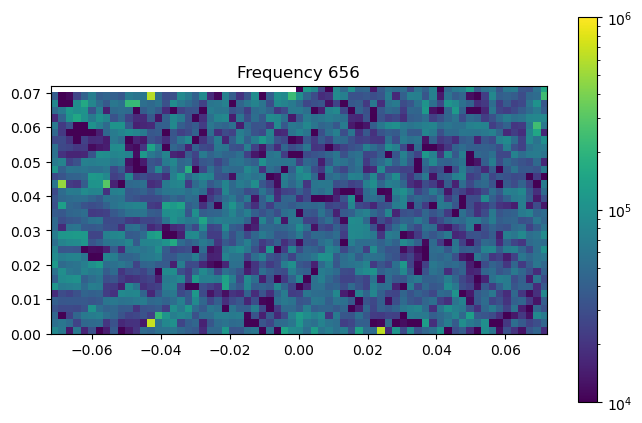

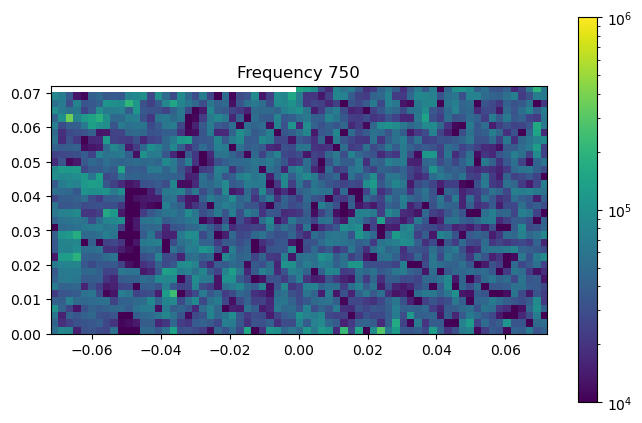

In [83]:
freqs = [56, 3, 200, 500, 656, 750]

print(f'Plotting data sum from the Obs 384 XX Dirty Data Sum')
for i, x in enumerate (freqs):
    plot_data_sum(0, x)

Text(0.5, 1.0, 'Frequency 750')

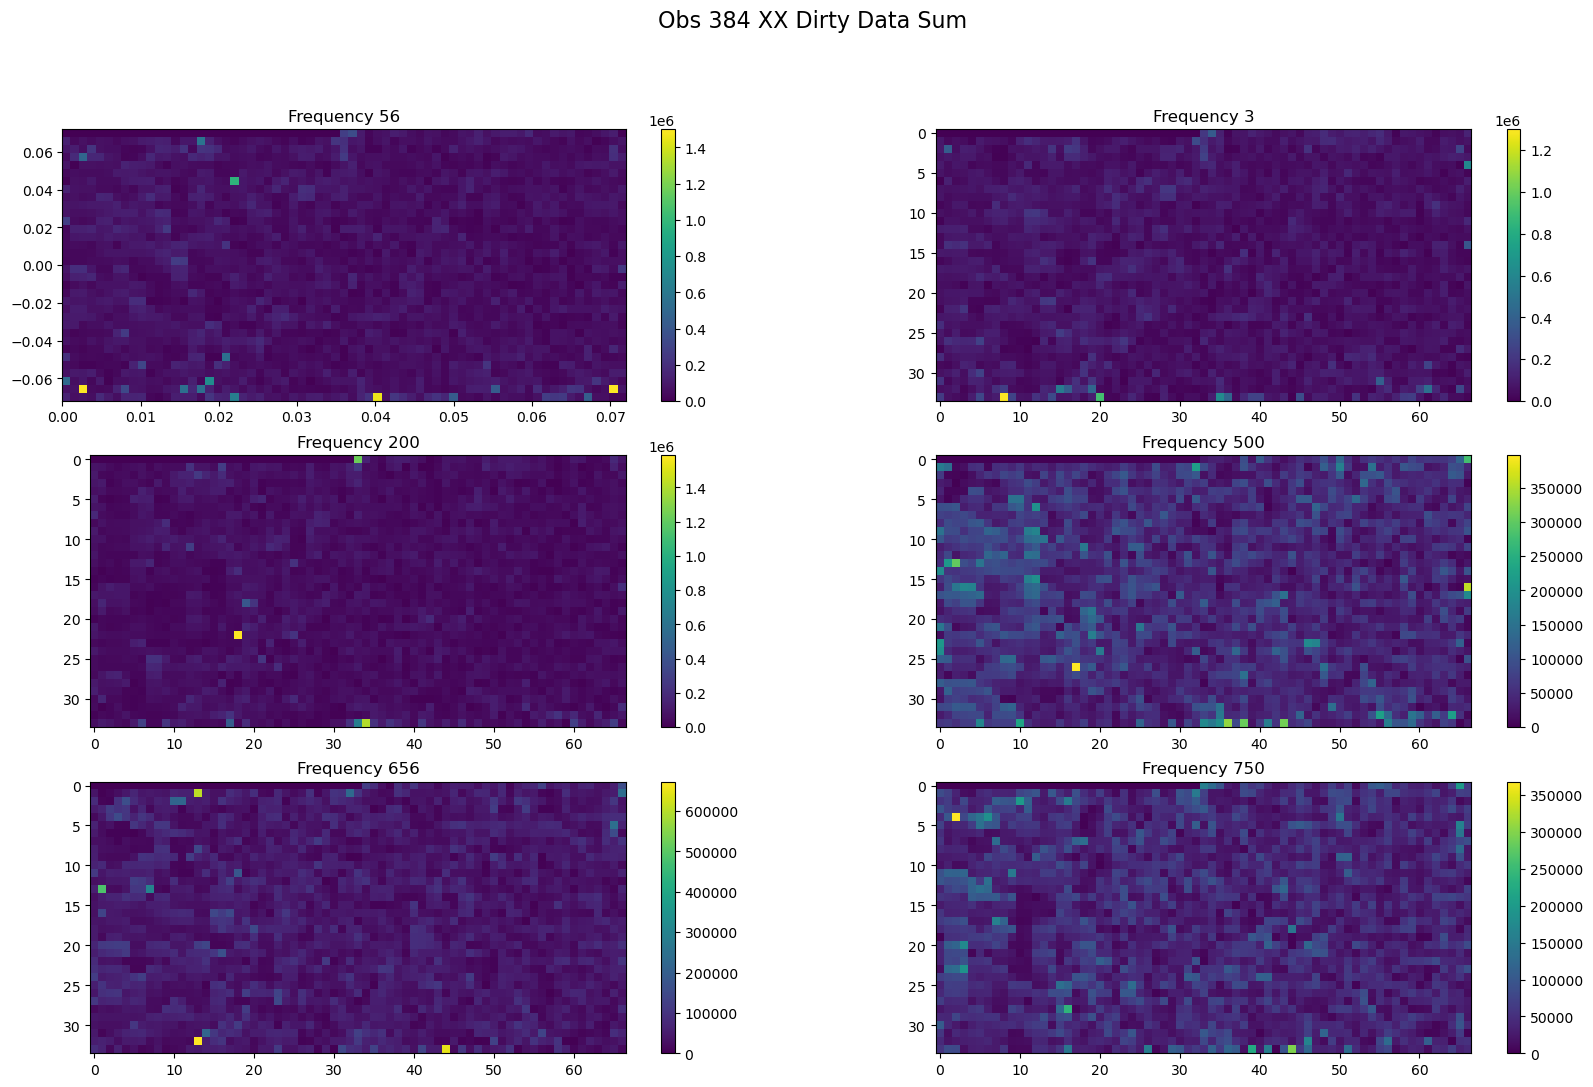

In [61]:
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(20, 12)
fig.suptitle('Obs 384 XX Dirty Data Sum', fontsize = 16)

pos = ax[0,0].imshow(np.abs(data_384[0]['data_sum'][56,:,:]), extent = [data_384[0]['ky_mpc'][0], data_384[0]['ky_mpc'][-1],
                                                                 data_384[0]['kx_mpc'][0], data_384[0]['kx_mpc'][-1]], vmin = 0, vmax = 1.5e6, aspect = 'auto')
fig.colorbar(pos, ax=ax[0,0])
ax[0,0].set_title('Frequency 56')

pos2 = ax[0,1].imshow(np.abs(data_384[0]['data_sum'][3,:,:]))
fig.colorbar(pos2, ax=ax[0,1])
ax[0,1].set_title('Frequency 3')

pos3 = ax[1,0].imshow(np.abs(data_384[0]['data_sum'][200,:,:]))
fig.colorbar(pos3, ax=ax[1,0])
ax[1,0].set_title('Frequency 200')

pos4 = ax[1,1].imshow(np.abs(data_384[0]['data_sum'][500,:,:]))
fig.colorbar(pos4, ax=ax[1,1])
ax[1,1].set_title('Frequency 500')

pos5 = ax[2,0].imshow(np.abs(data_384[0]['data_sum'][656,:,:]))
fig.colorbar(pos5, ax=ax[2,0])
ax[2,0].set_title('Frequency 656')

pos6 = ax[2,1].imshow(np.abs(data_384[0]['data_sum'][750,:,:]))
fig.colorbar(pos6, ax=ax[2,1])
ax[2,1].set_title('Frequency 750')

Text(0.5, 1.0, 'Frequency 750')

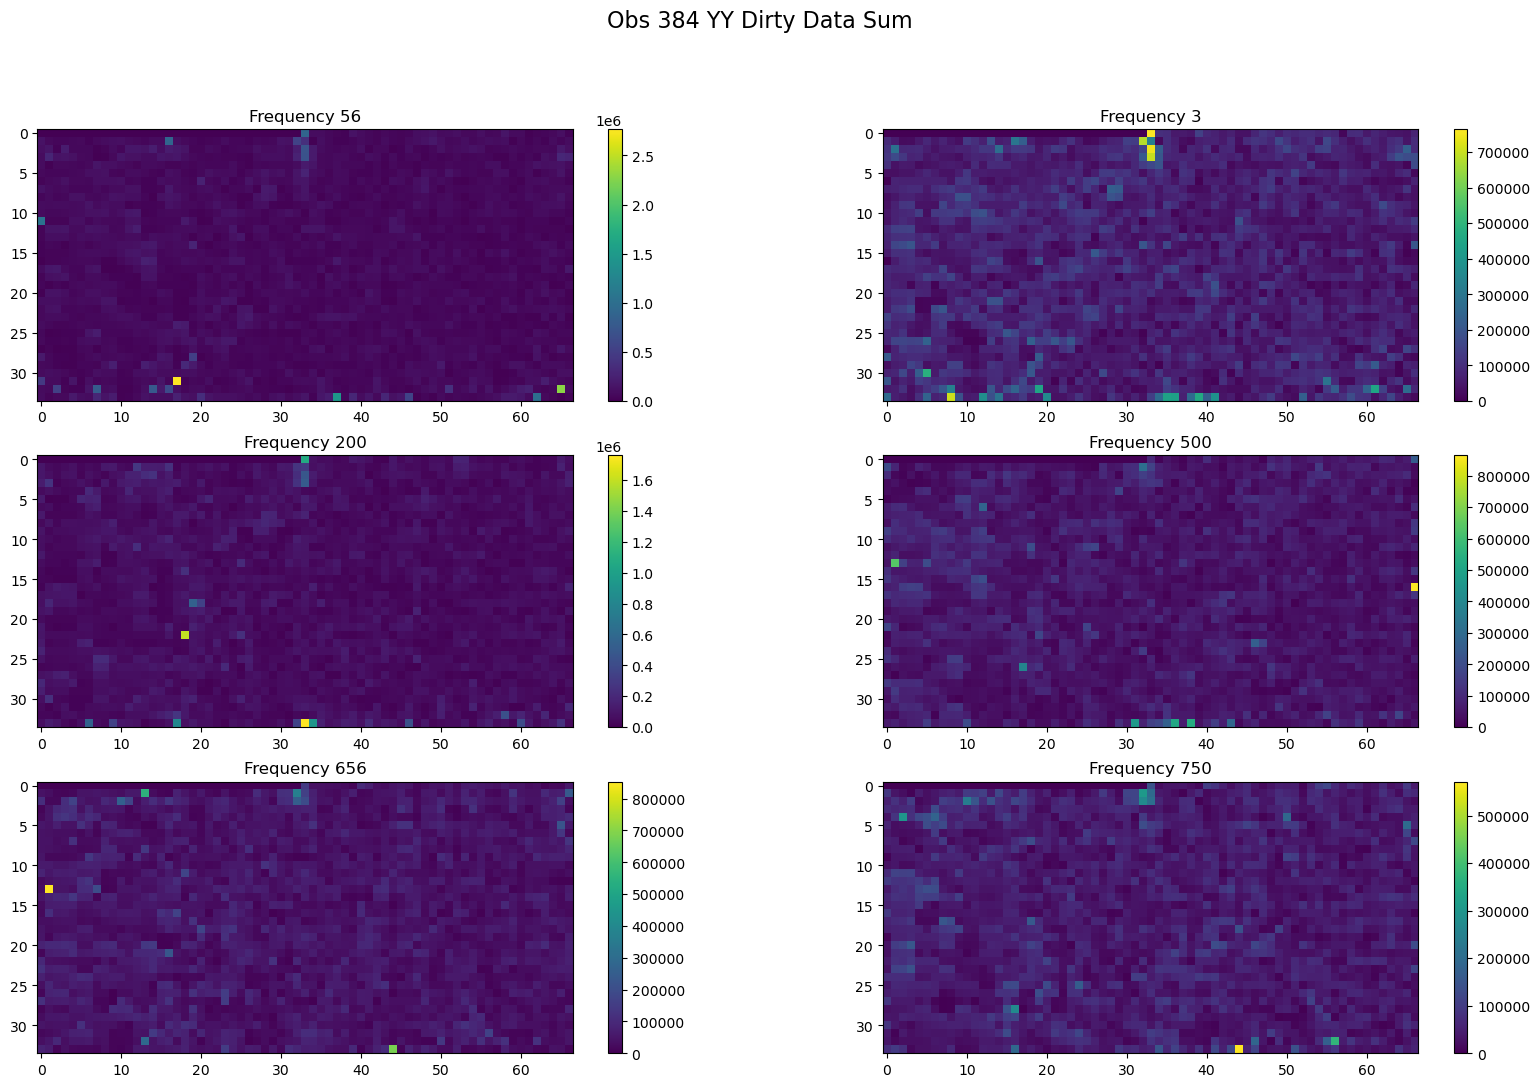

In [47]:
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(20, 12)
fig.suptitle('Obs 384 YY Dirty Data Sum', fontsize = 16)

pos = ax[0,0].imshow(np.abs(data_384[1]['data_sum'][56,:,:]))
fig.colorbar(pos, ax=ax[0,0])
ax[0,0].set_title('Frequency 56')

pos2 = ax[0,1].imshow(np.abs(data_384[1]['data_sum'][3,:,:]))
fig.colorbar(pos2, ax=ax[0,1])
ax[0,1].set_title('Frequency 3')

pos3 = ax[1,0].imshow(np.abs(data_384[1]['data_sum'][200,:,:]))
fig.colorbar(pos3, ax=ax[1,0])
ax[1,0].set_title('Frequency 200')

pos4 = ax[1,1].imshow(np.abs(data_384[1]['data_sum'][500,:,:]))
fig.colorbar(pos4, ax=ax[1,1])
ax[1,1].set_title('Frequency 500')

pos5 = ax[2,0].imshow(np.abs(data_384[1]['data_sum'][656,:,:]))
fig.colorbar(pos5, ax=ax[2,0])
ax[2,0].set_title('Frequency 656')

pos6 = ax[2,1].imshow(np.abs(data_384[1]['data_sum'][750,:,:]))
fig.colorbar(pos6, ax=ax[2,1])
ax[2,1].set_title('Frequency 750')

Text(0.5, 1.0, 'Frequency 750')

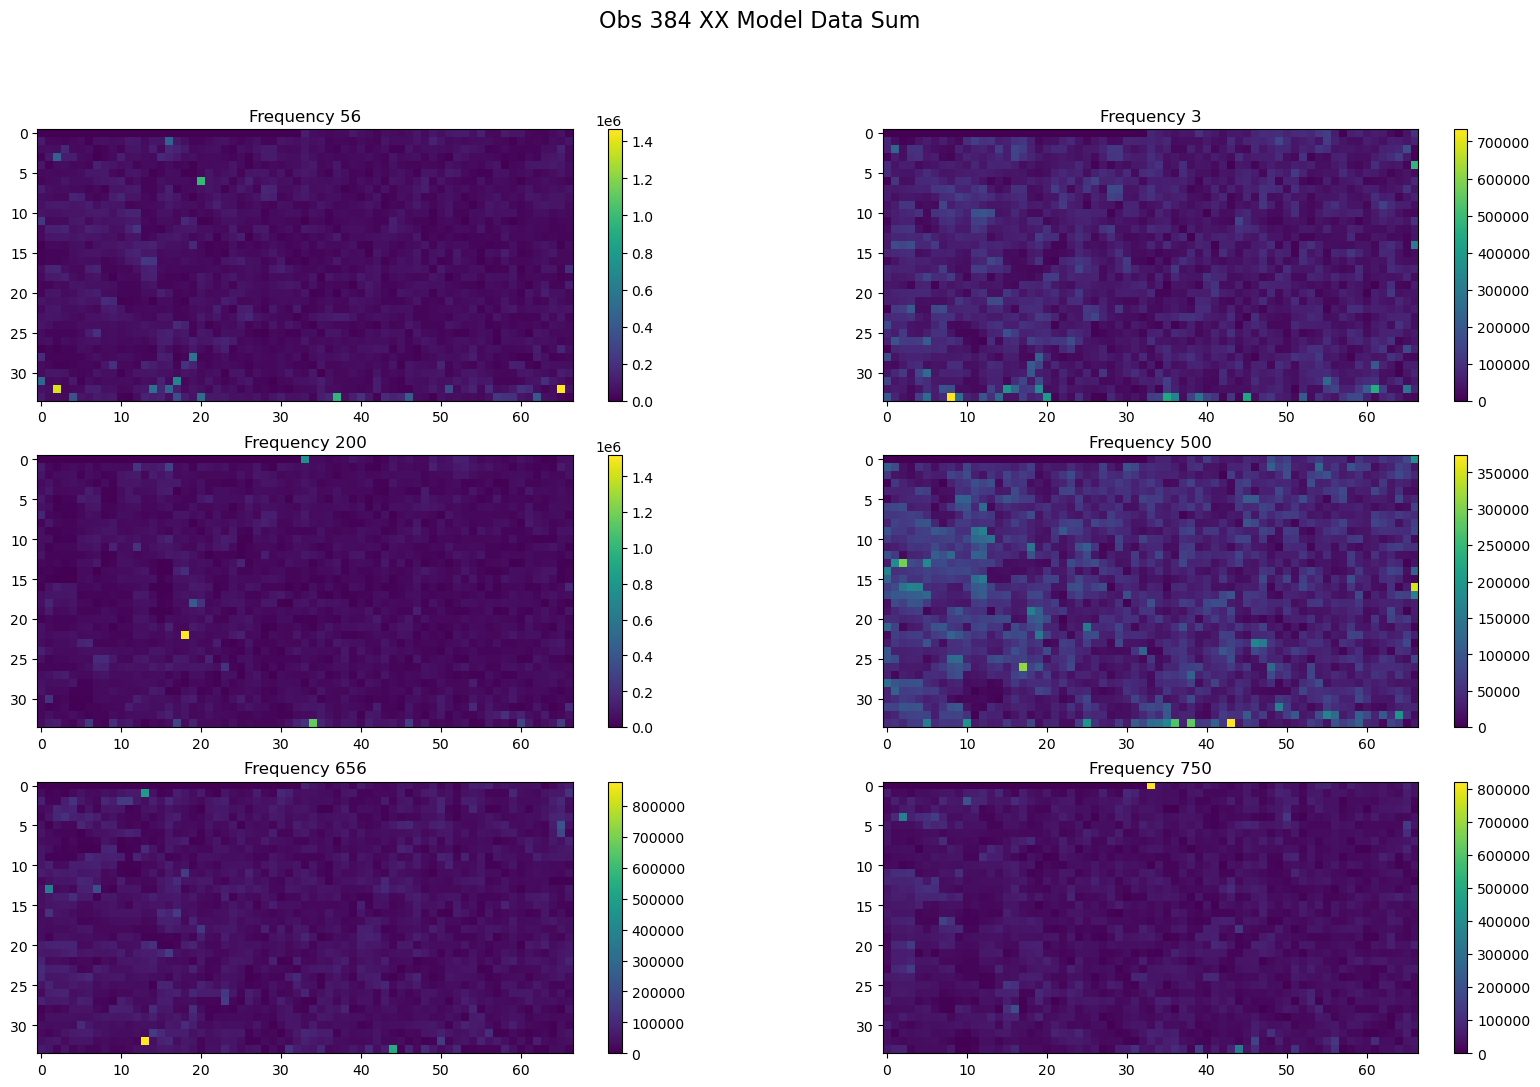

In [46]:
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(20, 12)
fig.suptitle('Obs 384 XX Model Data Sum', fontsize = 16)

pos = ax[0,0].imshow(np.abs(data_384[2]['data_sum'][56,:,:]))
fig.colorbar(pos, ax=ax[0,0])
ax[0,0].set_title('Frequency 56')

pos2 = ax[0,1].imshow(np.abs(data_384[2]['data_sum'][3,:,:]))
fig.colorbar(pos2, ax=ax[0,1])
ax[0,1].set_title('Frequency 3')

pos3 = ax[1,0].imshow(np.abs(data_384[2]['data_sum'][200,:,:]))
fig.colorbar(pos3, ax=ax[1,0])
ax[1,0].set_title('Frequency 200')

pos4 = ax[1,1].imshow(np.abs(data_384[2]['data_sum'][500,:,:]))
fig.colorbar(pos4, ax=ax[1,1])
ax[1,1].set_title('Frequency 500')

pos5 = ax[2,0].imshow(np.abs(data_384[2]['data_sum'][656,:,:]))
fig.colorbar(pos5, ax=ax[2,0])
ax[2,0].set_title('Frequency 656')

pos6 = ax[2,1].imshow(np.abs(data_384[2]['data_sum'][750,:,:]))
fig.colorbar(pos6, ax=ax[2,1])
ax[2,1].set_title('Frequency 750')

Text(0.5, 1.0, 'Frequency 750')

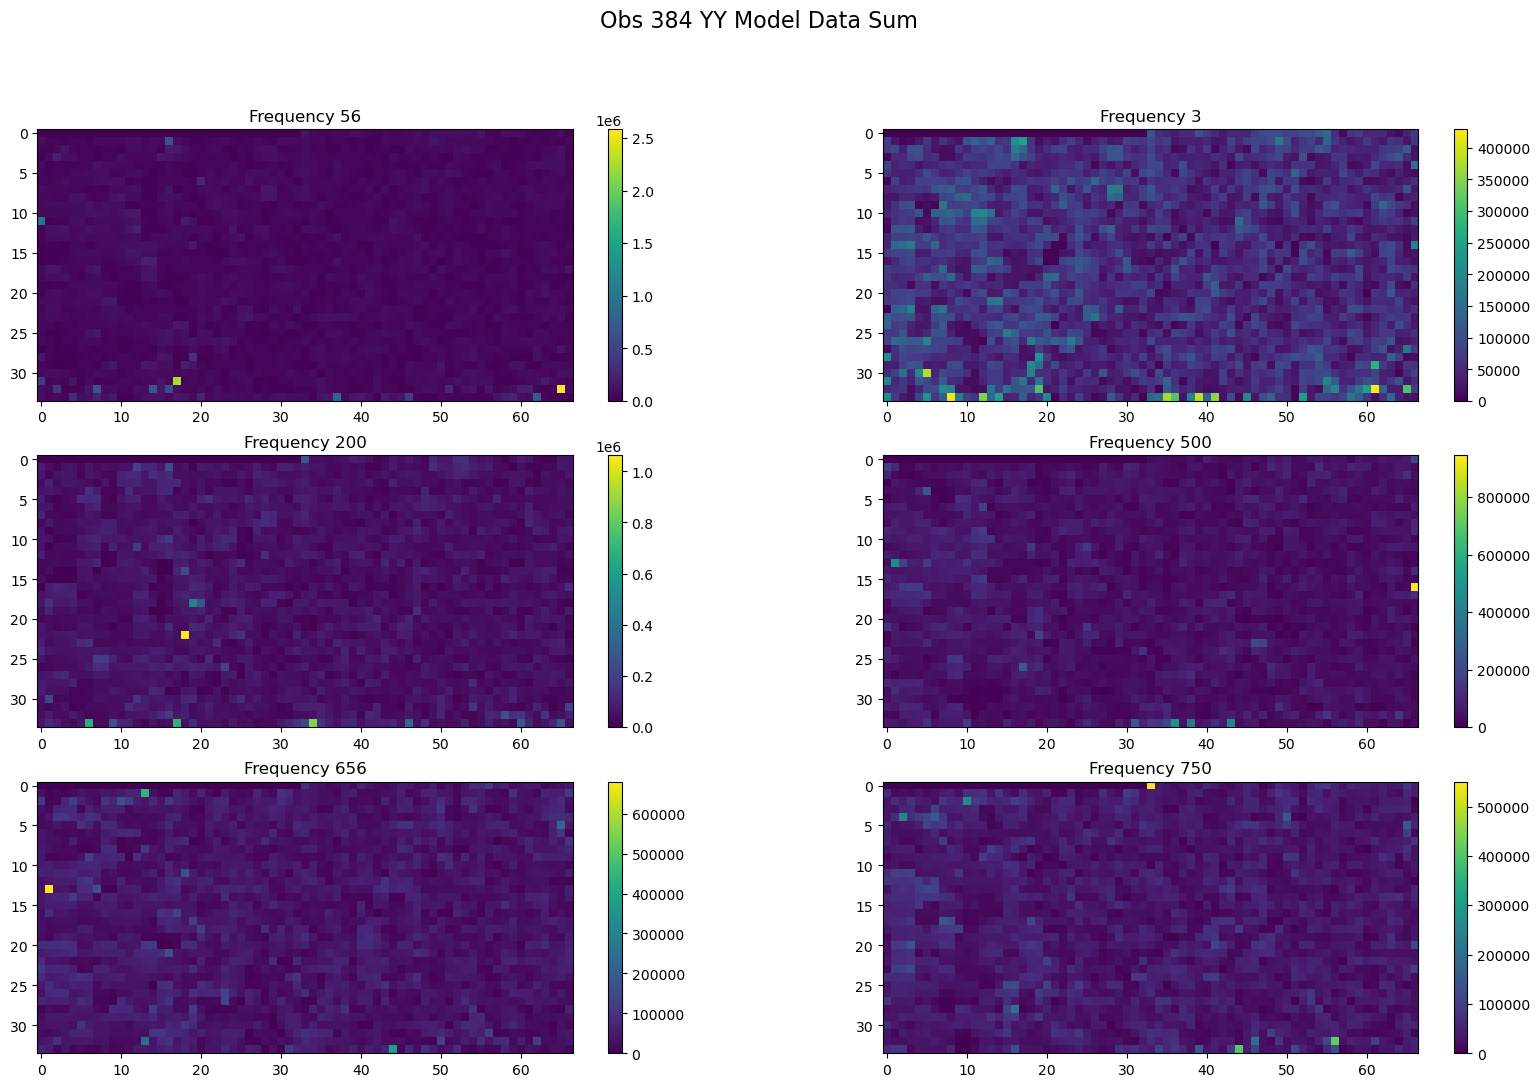

In [45]:
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(20, 12)
fig.suptitle('Obs 384 YY Model Data Sum', fontsize = 16)

pos = ax[0,0].imshow(np.abs(data_384[3]['data_sum'][56,:,:]))
fig.colorbar(pos, ax=ax[0,0])
ax[0,0].set_title('Frequency 56')

pos2 = ax[0,1].imshow(np.abs(data_384[3]['data_sum'][3,:,:]))
fig.colorbar(pos2, ax=ax[0,1])
ax[0,1].set_title('Frequency 3')

pos3 = ax[1,0].imshow(np.abs(data_384[3]['data_sum'][200,:,:]))
fig.colorbar(pos3, ax=ax[1,0])
ax[1,0].set_title('Frequency 200')

pos4 = ax[1,1].imshow(np.abs(data_384[3]['data_sum'][500,:,:]))
fig.colorbar(pos4, ax=ax[1,1])
ax[1,1].set_title('Frequency 500')

pos5 = ax[2,0].imshow(np.abs(data_384[3]['data_sum'][656,:,:]))
fig.colorbar(pos5, ax=ax[2,0])
ax[2,0].set_title('Frequency 656')

pos6 = ax[2,1].imshow(np.abs(data_384[3]['data_sum'][750,:,:]))
fig.colorbar(pos6, ax=ax[2,1])
ax[2,1].set_title('Frequency 750')

Text(0.5, 1.0, 'Frequency 750')

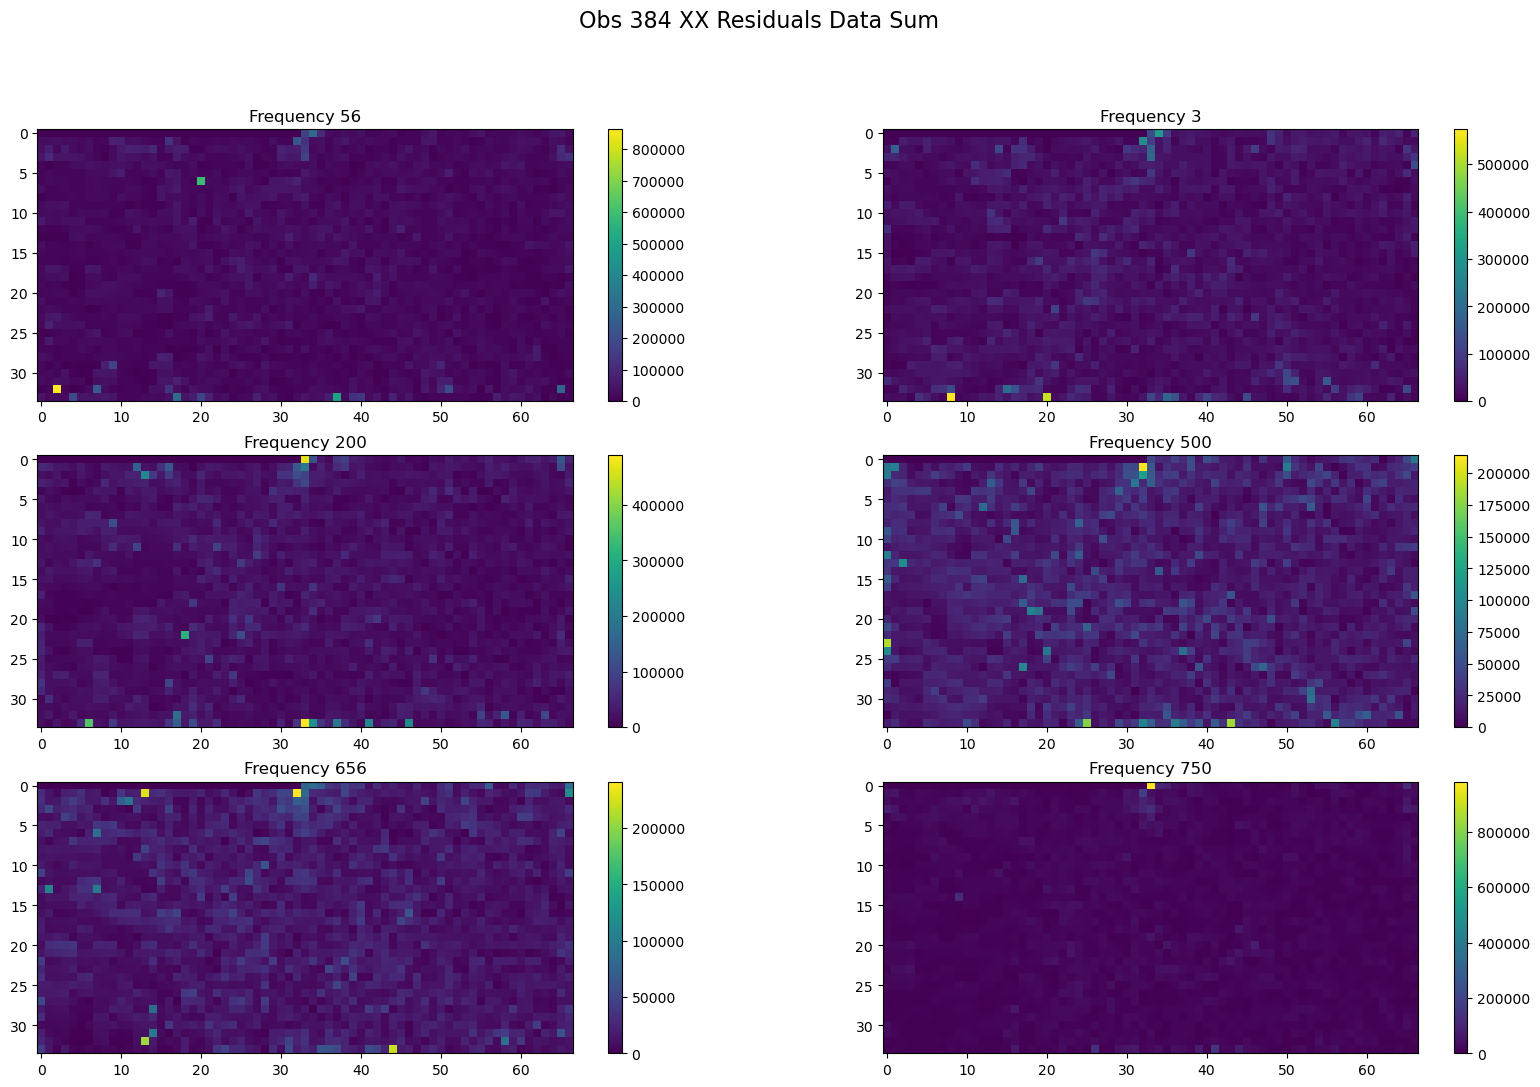

In [44]:
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(20, 12)
fig.suptitle('Obs 384 XX Residuals Data Sum', fontsize = 16)

pos = ax[0,0].imshow(np.abs(data_384[4]['data_sum'][56,:,:]))
fig.colorbar(pos, ax=ax[0,0])
ax[0,0].set_title('Frequency 56')

pos2 = ax[0,1].imshow(np.abs(data_384[4]['data_sum'][3,:,:]))
fig.colorbar(pos2, ax=ax[0,1])
ax[0,1].set_title('Frequency 3')

pos3 = ax[1,0].imshow(np.abs(data_384[4]['data_sum'][200,:,:]))
fig.colorbar(pos3, ax=ax[1,0])
ax[1,0].set_title('Frequency 200')

pos4 = ax[1,1].imshow(np.abs(data_384[4]['data_sum'][500,:,:]))
fig.colorbar(pos4, ax=ax[1,1])
ax[1,1].set_title('Frequency 500')

pos5 = ax[2,0].imshow(np.abs(data_384[4]['data_sum'][656,:,:]))
fig.colorbar(pos5, ax=ax[2,0])
ax[2,0].set_title('Frequency 656')

pos6 = ax[2,1].imshow(np.abs(data_384[4]['data_sum'][750,:,:]))
fig.colorbar(pos6, ax=ax[2,1])
ax[2,1].set_title('Frequency 750')

Text(0.5, 1.0, 'Frequency 750')

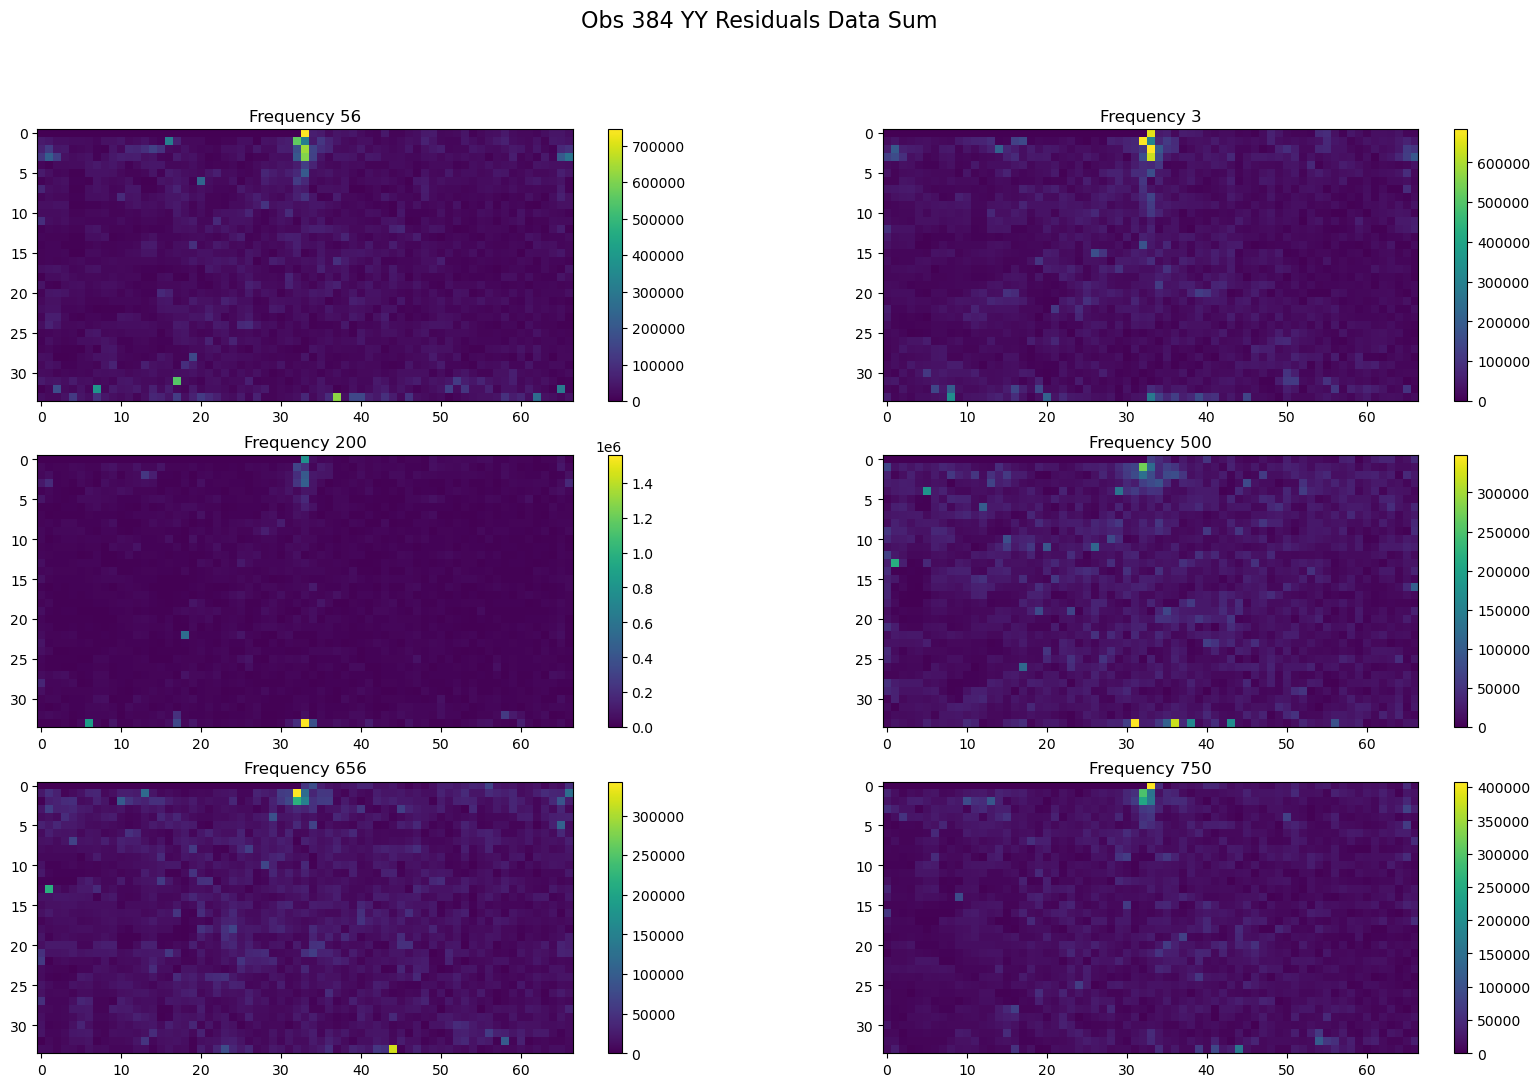

In [43]:
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(20, 12)
fig.suptitle('Obs 384 YY Residuals Data Sum', fontsize = 16)

pos = ax[0,0].imshow(np.abs(data_384[5]['data_sum'][56,:,:]))
fig.colorbar(pos, ax=ax[0,0])
ax[0,0].set_title('Frequency 56')

pos2 = ax[0,1].imshow(np.abs(data_384[5]['data_sum'][3,:,:]))
fig.colorbar(pos2, ax=ax[0,1])
ax[0,1].set_title('Frequency 3')

pos3 = ax[1,0].imshow(np.abs(data_384[5]['data_sum'][200,:,:]))
fig.colorbar(pos3, ax=ax[1,0])
ax[1,0].set_title('Frequency 200')

pos4 = ax[1,1].imshow(np.abs(data_384[5]['data_sum'][500,:,:]))
fig.colorbar(pos4, ax=ax[1,1])
ax[1,1].set_title('Frequency 500')

pos5 = ax[2,0].imshow(np.abs(data_384[5]['data_sum'][656,:,:]))
fig.colorbar(pos5, ax=ax[2,0])
ax[2,0].set_title('Frequency 656')

pos6 = ax[2,1].imshow(np.abs(data_384[5]['data_sum'][750,:,:]))
fig.colorbar(pos6, ax=ax[2,1])
ax[2,1].set_title('Frequency 750')